<a href="https://colab.research.google.com/github/Sushil545/data-science-task-/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [ ]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic.drop(columns=['Cabin'], inplace=True)

In [ ]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [ ]:
titanic['IsAlone'] = 1  # Initialize to 1 (i.e., is alone)
titanic['IsAlone'].loc[titanic['FamilySize'] > 1] = 0  # If FamilySize > 1, then not alone

<ipython-input-9-178d7761e304>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['IsAlone'].loc[titanic['FamilySize'] > 1] = 0  # If FamilySize > 1, then not alone


In [ ]:
titanic.to_csv('cleaned_titanic.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
bins = [0, 12, 18, 25, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elderly']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins, labels=labels)

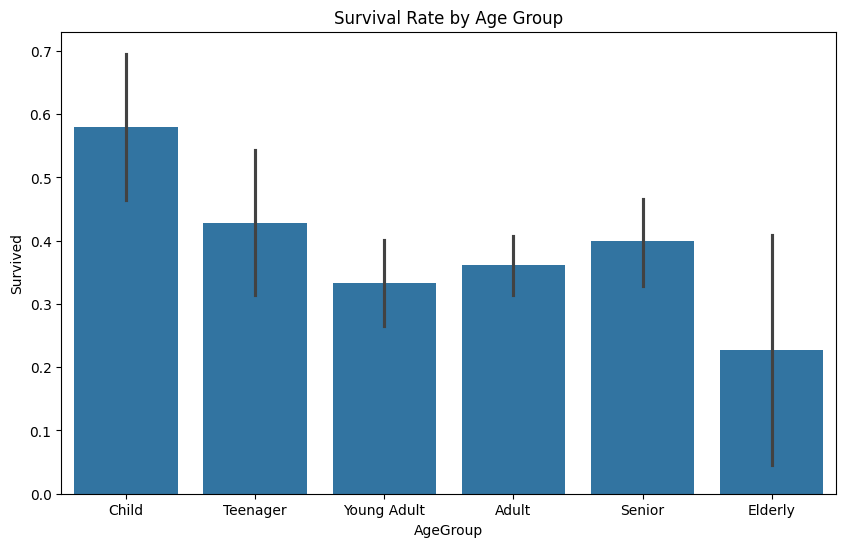

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.show()

In [ ]:
fare_bins = [-1, 7.91, 14.454, 31, 513]
fare_labels = ['Low Fare', 'Median Fare', 'Average Fare', 'High Fare']
titanic['FareGroup'] = pd.cut(titanic['Fare'], bins=fare_bins, labels=fare_labels)

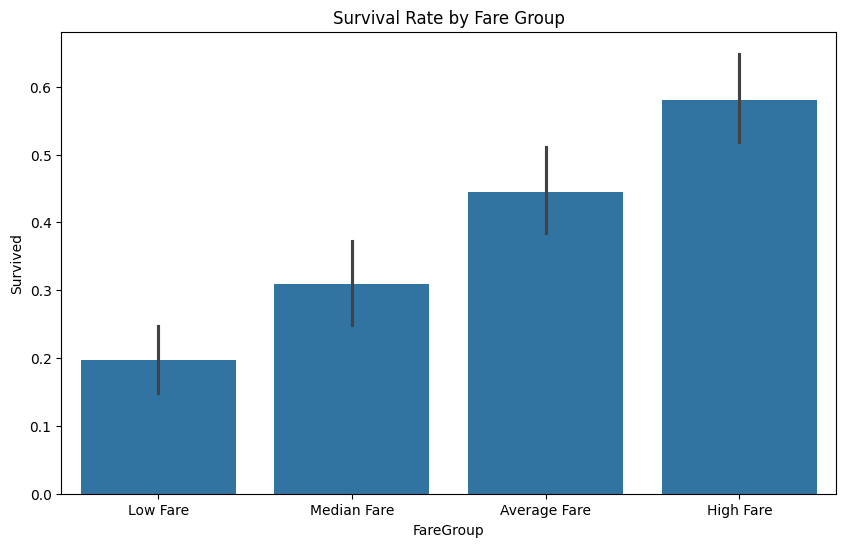

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FareGroup', y='Survived', data=titanic)
plt.title('Survival Rate by Fare Group')
plt.show()

In [ ]:
titanic_encoded = titanic.copy()
titanic_encoded['Sex'] = titanic_encoded['Sex'].map({'male': 0, 'female': 1})
titanic_encoded['Embarked'] = titanic_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_encoded['AgeGroup'] = titanic_encoded['AgeGroup'].cat.codes
titanic_encoded['FareGroup'] = titanic_encoded['FareGroup'].cat.codes

In [ ]:
numeric_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']

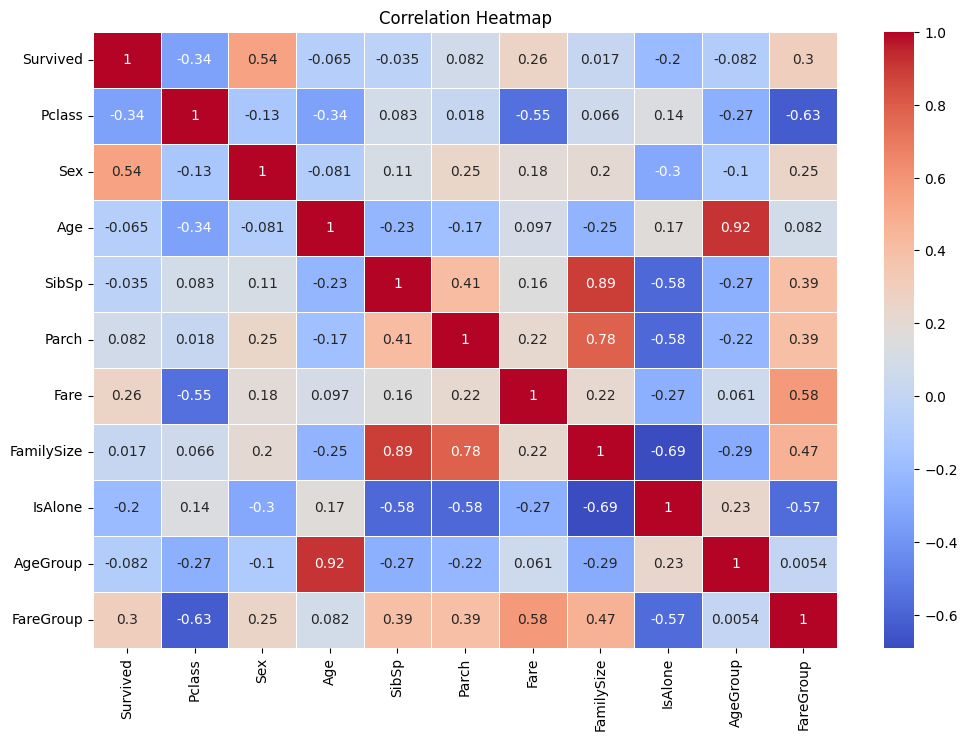

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_encoded[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

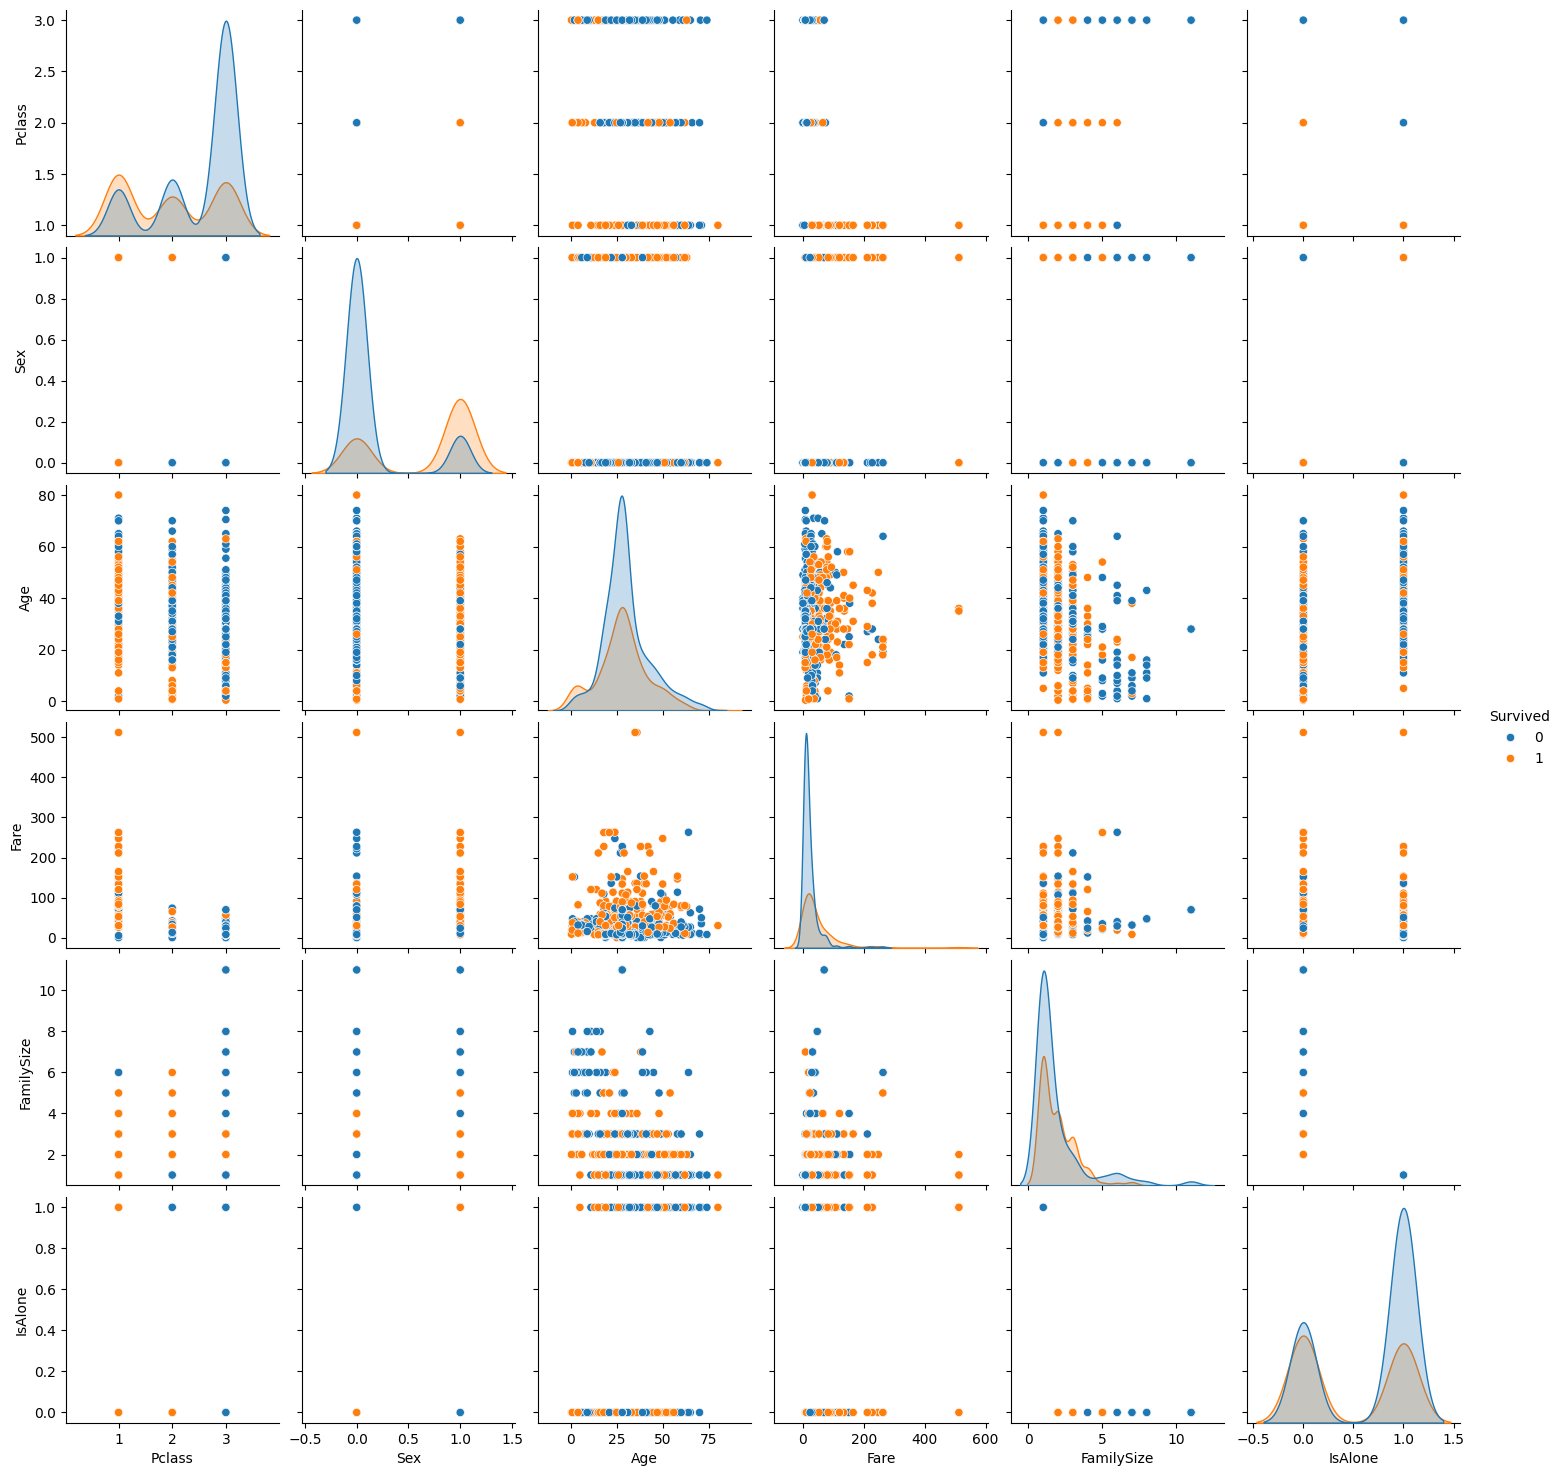

In [ ]:
sns.pairplot(titanic_encoded[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']], hue='Survived')
plt.show()

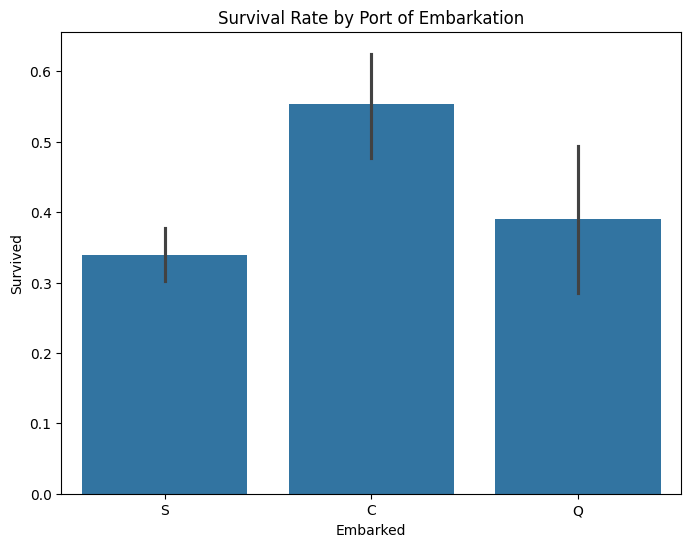

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('Survival Rate by Port of Embarkation')
plt.show()

In [ ]:
titanic.to_csv('updated_titanic.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('updated_titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>